In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [20]:
df = pd.read_csv('NSMES1988.csv', index_col=0)
df.head()

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,afam,gender,married,school,income,employed,insurance,medicaid
1,5,0,0,0,0,1,average,2,normal,other,6.9,yes,male,yes,6,2.8810,yes,yes,no
2,1,0,2,0,2,0,average,2,normal,other,7.4,no,female,yes,10,2.7478,no,yes,no
3,13,0,0,0,3,3,poor,4,limited,other,6.6,yes,female,no,10,0.6532,no,no,yes
4,16,0,5,0,1,1,poor,2,limited,other,7.6,no,male,yes,3,0.6588,no,yes,no
5,3,0,0,0,0,0,average,2,limited,other,7.9,no,female,yes,6,0.6588,no,yes,no


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4406 entries, 1 to 4406
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4406 non-null   int64  
 1   nvisits    4406 non-null   int64  
 2   ovisits    4406 non-null   int64  
 3   novisits   4406 non-null   int64  
 4   emergency  4406 non-null   int64  
 5   hospital   4406 non-null   int64  
 6   health     4406 non-null   object 
 7   chronic    4406 non-null   int64  
 8   adl        4406 non-null   object 
 9   region     4406 non-null   object 
 10  age        4406 non-null   float64
 11  afam       4406 non-null   object 
 12  gender     4406 non-null   object 
 13  married    4406 non-null   object 
 14  school     4406 non-null   int64  
 15  income     4406 non-null   float64
 16  employed   4406 non-null   object 
 17  insurance  4406 non-null   object 
 18  medicaid   4406 non-null   object 
dtypes: float64(2), int64(8), object(9)
memory usage: 688.

In [22]:
df['age']*=10 
df['income']*=10000
df.head()

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,afam,gender,married,school,income,employed,insurance,medicaid
1,5,0,0,0,0,1,average,2,normal,other,69.0,yes,male,yes,6,28810.0,yes,yes,no
2,1,0,2,0,2,0,average,2,normal,other,74.0,no,female,yes,10,27478.0,no,yes,no
3,13,0,0,0,3,3,poor,4,limited,other,66.0,yes,female,no,10,6532.0,no,no,yes
4,16,0,5,0,1,1,poor,2,limited,other,76.0,no,male,yes,3,6588.0,no,yes,no
5,3,0,0,0,0,0,average,2,limited,other,79.0,no,female,yes,6,6588.0,no,yes,no


In [23]:
df['age'] = pd.to_numeric(df['age'], downcast='integer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4406 entries, 1 to 4406
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4406 non-null   int64  
 1   nvisits    4406 non-null   int64  
 2   ovisits    4406 non-null   int64  
 3   novisits   4406 non-null   int64  
 4   emergency  4406 non-null   int64  
 5   hospital   4406 non-null   int64  
 6   health     4406 non-null   object 
 7   chronic    4406 non-null   int64  
 8   adl        4406 non-null   object 
 9   region     4406 non-null   object 
 10  age        4406 non-null   int8   
 11  afam       4406 non-null   object 
 12  gender     4406 non-null   object 
 13  married    4406 non-null   object 
 14  school     4406 non-null   int64  
 15  income     4406 non-null   float64
 16  employed   4406 non-null   object 
 17  insurance  4406 non-null   object 
 18  medicaid   4406 non-null   object 
dtypes: float64(1), int64(8), int8(1), object(9)
memory us

In [24]:
cat_feature_list=df.select_dtypes(include='object').columns
cat_feature_list

Index(['health', 'adl', 'region', 'afam', 'gender', 'married', 'employed',
       'insurance', 'medicaid'],
      dtype='object')

In [25]:
number_list=df.select_dtypes(exclude='object').columns
number_list

Index(['visits', 'nvisits', 'ovisits', 'novisits', 'emergency', 'hospital',
       'chronic', 'age', 'school', 'income'],
      dtype='object')

In [26]:
df.describe()

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,74.024058,10.290286,25271.320468
std,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,6.334050,3.738736,29246.476178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,0.000000,-10125.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,69.000000,8.000000,9121.500000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,73.000000,11.000000,16981.500000
75%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,78.000000,12.000000,31728.500000
max,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,109.000000,18.000000,548351.000000


- Mostly old people with an average 74 age
- 

In [30]:
df.groupby('employed')['hospital'].sum().sort_values()

employed
yes     103
no     1201
Name: hospital, dtype: int64

In [42]:
df.pivot_table(index='health',values=number_list,aggfunc=['mean'])

mean                                                        \
                 age   chronic emergency  hospital        income  novisits   
health                                                                       
average    73.849245  1.430892  0.223425  0.252779  25519.896449  0.548589   
excellent  73.102041  0.749271  0.096210  0.099125  32774.114577  0.163265   
poor       75.702166  2.736462  0.620939  0.691336  19051.624621  0.687726   

                                                    
            nvisits   ovisits     school    visits  
health                                              
average    1.652323  0.691650  10.426617  5.510687  
excellent  1.588921  0.341108  11.329446  3.428571  
poor       1.418773  1.379061   8.783394  8.897112

In [54]:
df.groupby(['region','gender'])['emergency'].median()

region     gender
midwest    female    0.0
           male      0.0
northeast  female    0.0
           male      0.0
other      female    0.0
           male      0.0
west       female    0.0
           male      0.0
Name: emergency, dtype: float64

In [55]:
df.pivot_table(index='region',columns='gender',values='emergency',aggfunc=['median'])

median     
gender    female male
region               
midwest      0.0  0.0
northeast    0.0  0.0
other        0.0  0.0
west         0.0  0.0

In [80]:
df.groupby('medicaid')['hospital'].sum()

medicaid
no     1137
yes     167
Name: hospital, dtype: int64

In [56]:
df_crosstab = pd.crosstab(index=df['medicaid'], columns=df['hospital'])
df_crosstab

hospital,0,1,2,3,4,5,6,7,8
medicaid,,,,,,,,,
no,3244,536,147,39,18,11,4,1,4
yes,297,63,29,9,2,1,1,0,0


- People with higher income has better health and have lower visits
- People with higher income has less chronic. 
- Most visits are not emergency visits (0 median)
- People with no medicaid have much more stays in hospital visits than people with medicaid

In [ ]:
plt.figure(figsize=(16,8))
plt.style.use('ggplot')
plt.plot

<Figure size 1600x800 with 0 Axes>

In [73]:
number_list

Index(['visits', 'nvisits', 'ovisits', 'novisits', 'emergency', 'hospital',
       'chronic', 'age', 'school', 'income'],
      dtype='object')

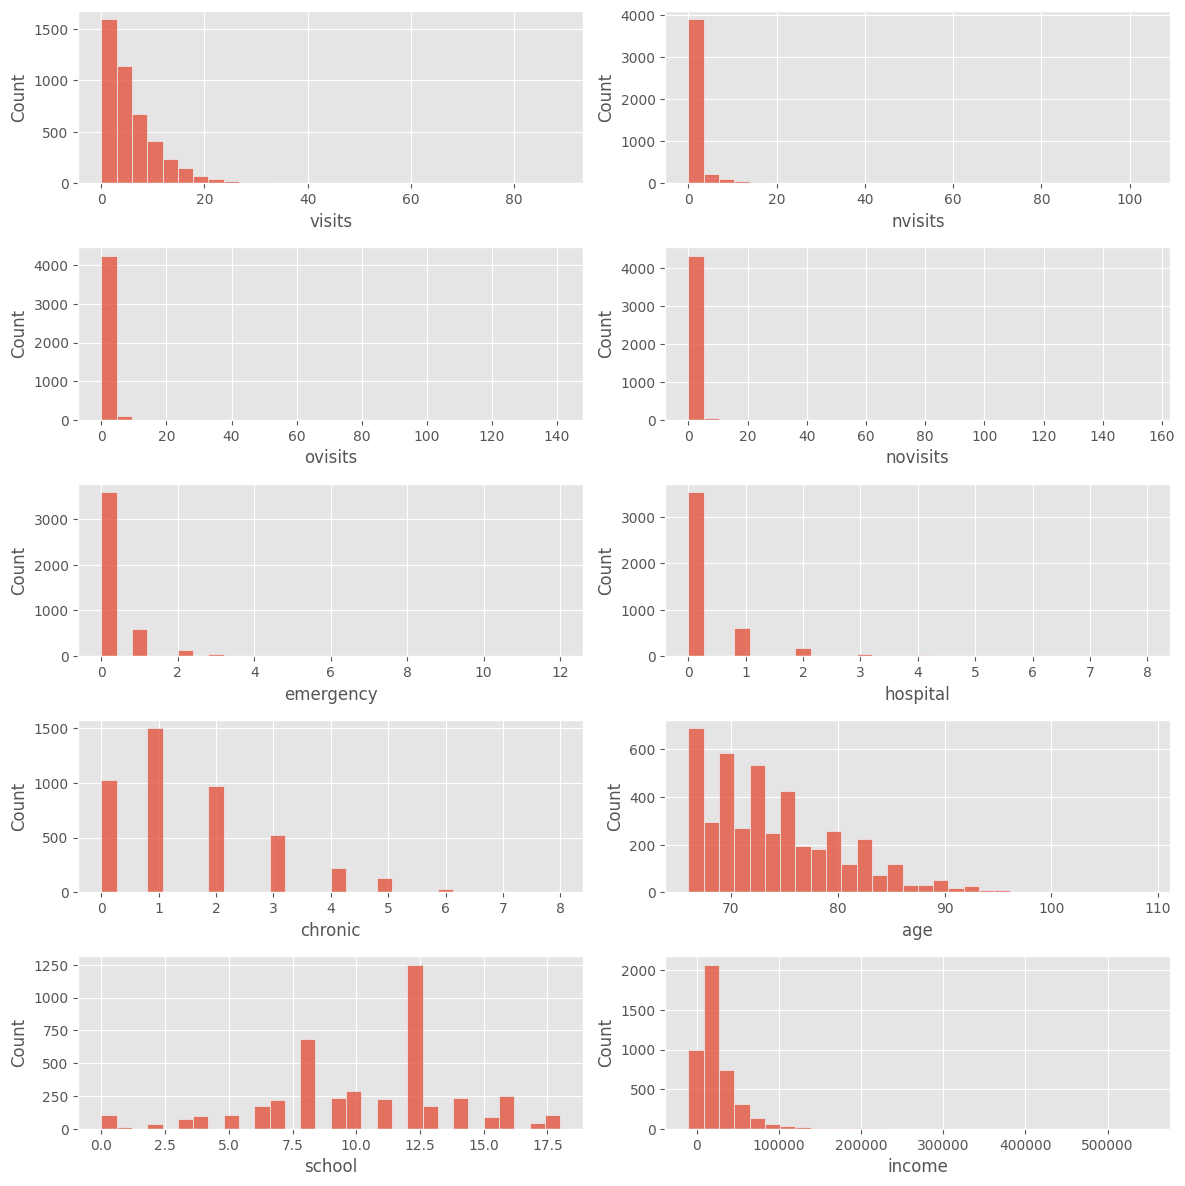

In [79]:
fig, axes=plt.subplots(nrows=5,ncols=2,figsize=(12,12))
axes = axes.flatten()
for  idx,col in enumerate(number_list):
    sns.histplot(data=df,x=col,bins=30, ax=axes[idx])
fig.tight_layout(pad=1.2, w_pad=1)

- All numerical columns has outliers

In [87]:
visits_lst = ['visits', 'nvisits', 'ovisits', 'novisits', 'emergency']
filteredlst = df.loc[df[visits_lst]>0]
filteredlst.head()

ValueError: Cannot index with multidimensional key

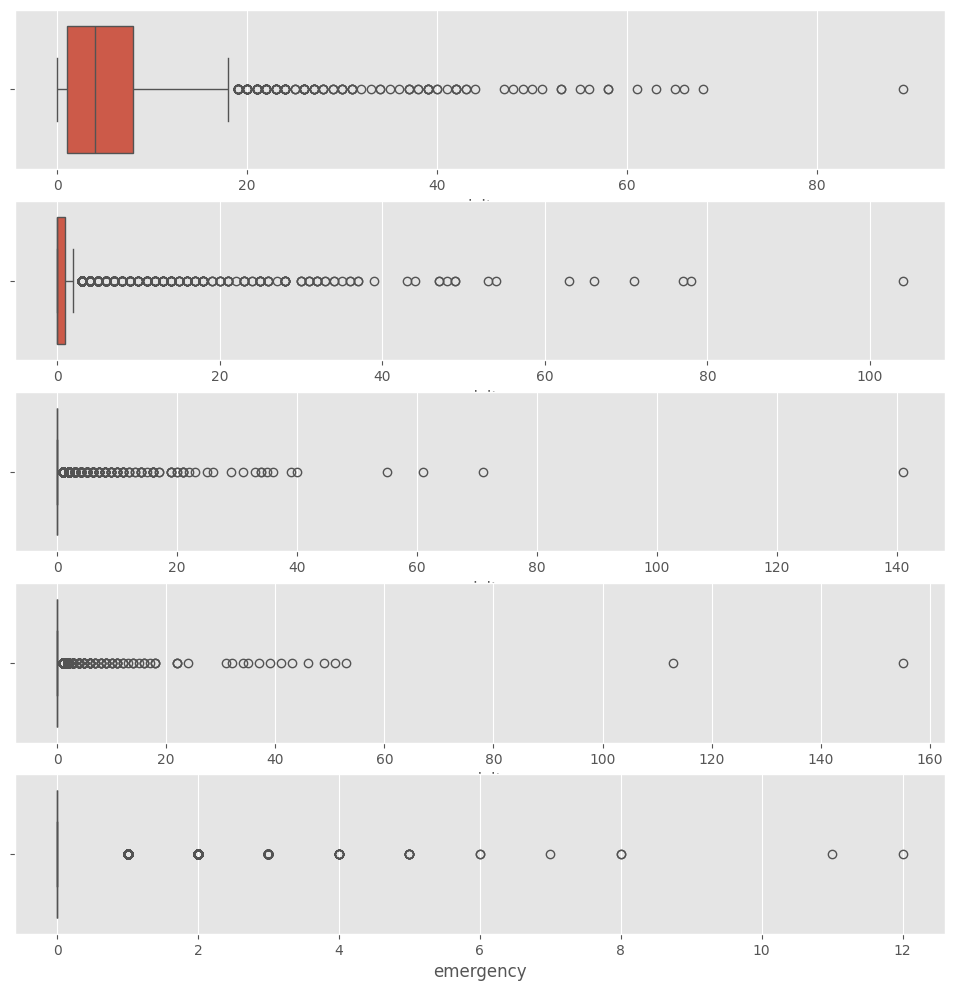

In [88]:

fig, axes=plt.subplots(nrows=5,ncols=1,figsize=(12,12))
axes = axes.flatten()
for  idx,col in enumerate(visits_lst):
    sns.boxplot(x=df[col], ax=axes[idx])

<Axes: xlabel='gender'>

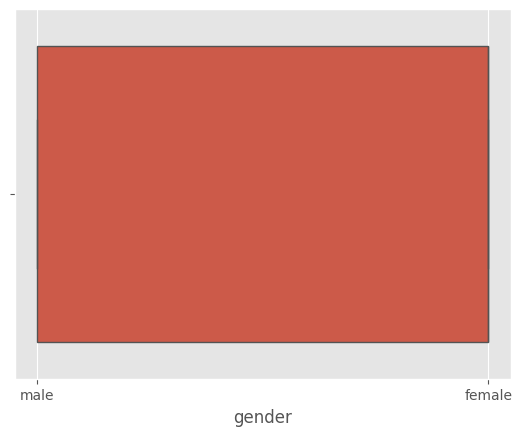

In [89]:
sns.boxplot(x=df['gender'])

<Axes: xlabel='married'>

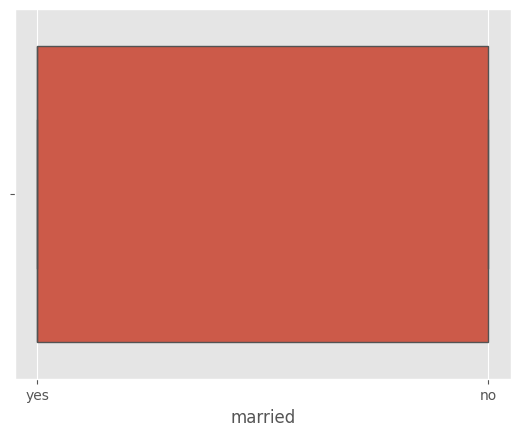

In [90]:
sns.boxplot(x=df['married'])

<Axes: xlabel='employed'>

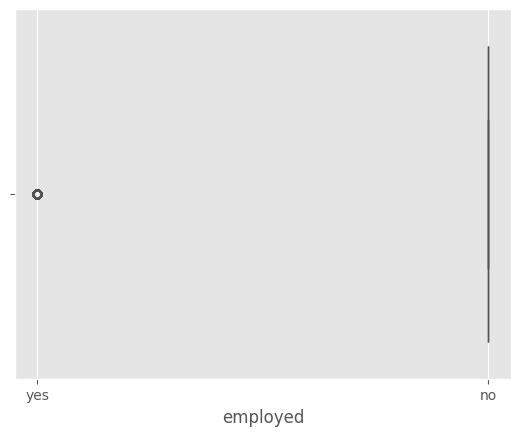

In [91]:
sns.boxplot(x=df['employed'])

- employed has `yes` as outlier while `married` `gender` does not have outliers


(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

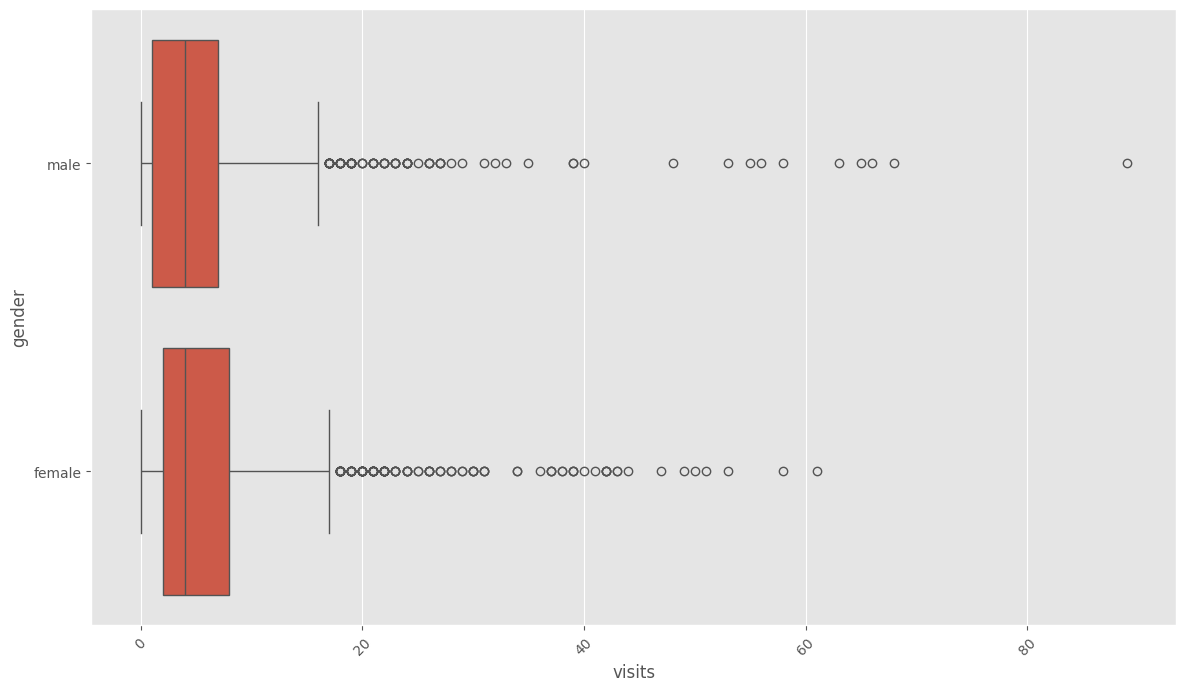

In [92]:
plt.figure(figsize=(14,8))
sns.boxplot(x=df['visits'], y=df['gender'])
plt.xticks(rotation=45)

<Axes: xlabel='married', ylabel='visits'>

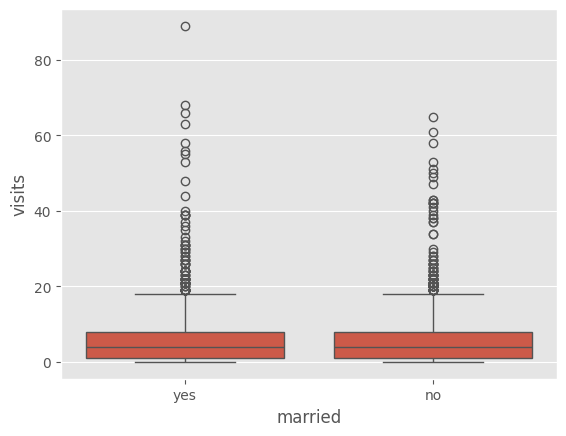

In [96]:
sns.boxplot(x=df['married'],y=df['visits'])

In [ ]:
df['agegroup'] = 

In [ ]:
df_crosstab = pd.crosstab(index=)
df.plot(kind='bar', stacked=True,figsize=(14,8),colormap='tab10')

<Axes: xlabel='age'>

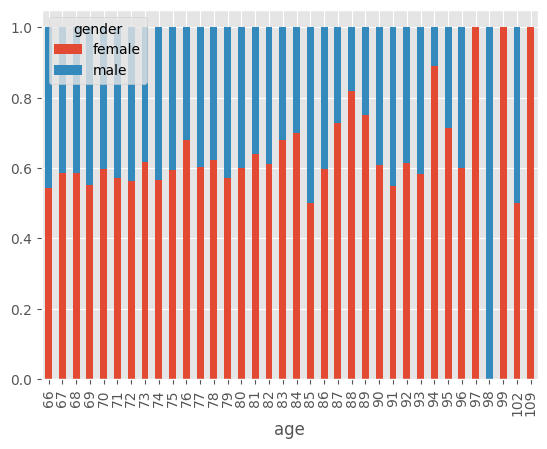

In [ ]:
age_gender_data=pd.crosstab(index=df['age'],columns=df['gender'],normalize='index')
age_gender_data.plot(kind='bar',stacked=True)

<Axes: xlabel='age', ylabel='Count'>

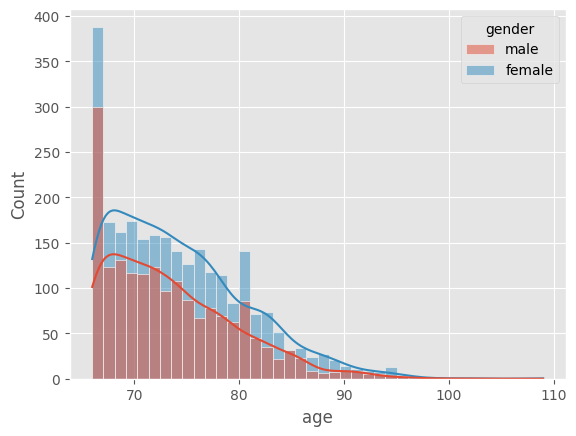

In [100]:
sns.histplot(data=df,x='age',hue='gender',kde=True)

In [102]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.bar(data_frame=age_gender_data, color='gender')
fig.show()